In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Load your CSV file
data = pd.read_excel('data.xlsx')  # Replace with your actual filename

In [9]:
resolution_m = 60e-6 #m
resolution_cm = 60e-4 #cm
sample_size_pixel = 400
sample_length_cm = resolution_cm * sample_size_pixel

data['cluster_density'] = data['num_cluster'] / (sample_length_cm**3)
data['anisotropy_MIL'] = (data['MIL_x'] + data['MIL_y']) / (2*data['MIL_z'])
data['avg_pore_diameter'] = data['avg_pore_diameter'] * 1e6
data['avg_throat_diameter'] = data['avg_throat_diameter'] * 1e6
data.columns

Index(['name', 'number_of_regions', 'starting_layer', 'ending_layer', 'depth',
       'sample_volume', 'porosity', 'open_pores', 'cuted_pores',
       'isolated_pores', 'euler_density', 'SSA', 'MIL_x', 'MIL_y', 'MIL_z',
       'Perm_x', 'Perm_y', 'Perm_z', 'Tort_x', 'Tort_y', 'Tort_z',
       'sph_ice_cluster', 'num_pores', 'num_throats', 'coordination_number',
       'avg_pore_volume', 'avg_pore_diameter', 'avg_throat_diameter',
       'avg_throat_length', 'max_connections', 'median_connections',
       'num_cluster', 'max_cluster_size', 'avg_cluster_size', 'new_depth',
       'cluster_density', 'anisotropy_MIL'],
      dtype='object')

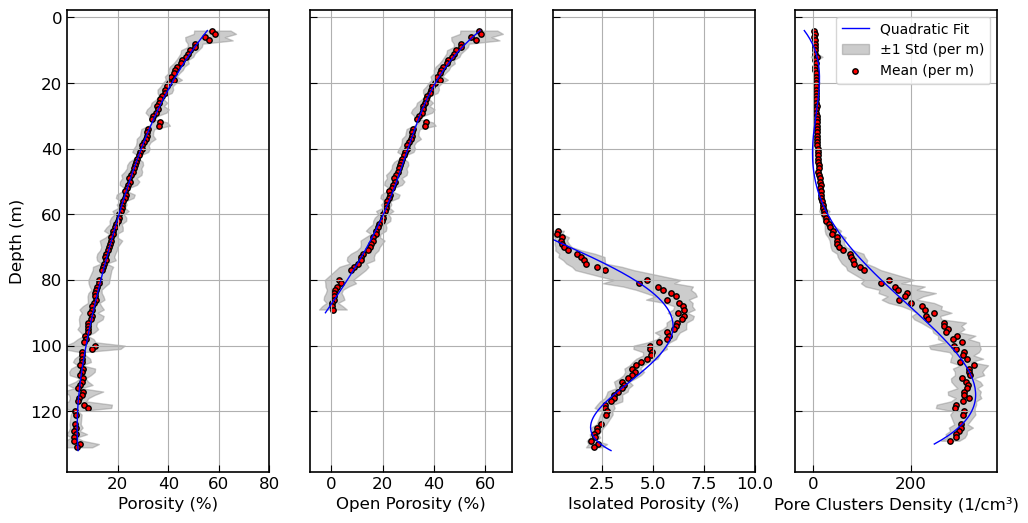

In [19]:
# Keep only necessary columns and drop NaNs
#df = df[["new_depth", "porosity", "SSA", "MIL_z"]].dropna()

# Sort data by depth for smooth plotting
df = data.sort_values(by="new_depth").copy()

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

# Apply academic-style formatting
plt.rcParams.update({
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5
})

# Plot configs
params = [
    ("porosity", "Porosity (%)"),
    ("open_pores", "Open Porosity (%)"),
    ("isolated_pores", "Isolated Porosity (%)"),
    ('cluster_density','Pore Clusters Density (1/cm³)')
]

depth = df["new_depth"]

for ax, (col, xlabel) in zip(axes, params):
    x = df[col]
    y = depth

    if col == "open_pores":
        # Subset for depth >= 50
        df_fit = df[df["new_depth"] < 90].copy()
        y = df_fit["new_depth"]
        x = df_fit[col]
        df_fit["depth_bin"] = df_fit["new_depth"].astype(int)
        grouped = df_fit.groupby("depth_bin")[col]

    elif col == 'isolated_pores':
        # Subset for depth >= 50
        df_fit = df[df["new_depth"]>65].copy()
        y = df_fit["new_depth"]
        x = df_fit[col]
        df_fit["depth_bin"] = df_fit["new_depth"].astype(int)
        grouped = df_fit.groupby("depth_bin")[col]
        ax.set_xlim(0.1, 10)

    elif col == "cluster_density":
        # Subset for depth >= 50
        df_fit = df[df["new_depth"] < 130].copy()
        y = df_fit["new_depth"]
        x = df_fit[col]
        df_fit["depth_bin"] = df_fit["new_depth"].astype(int)
        grouped = df_fit.groupby("depth_bin")[col]
        #ax.set_xlim(0.1, 200)
        
    else:
        x = df[col]
        y = depth
        ax.set_xlim(-2, 75)
        df["depth_bin"] = df["new_depth"].astype(int)
        grouped = df.groupby("depth_bin")[col]
        ax.set_xlim(0.1, 80)
    
    # Residuals and std
    #residuals = x_fit_data - poly(y_fit_data)
    #std = np.std(residuals)
    #ax.fill_betweenx(y_fit, x_fit - std, x_fit + std, color='gray', alpha=0.4, label='±1 Std Dev')

    mean_per_bin = grouped.mean()
    std_per_bin = grouped.std()
    depth_bins = mean_per_bin.index

        
        # Fit quadratic
    coeffs = np.polyfit(y, x, deg=4)
    poly = np.poly1d(coeffs)
        # Generate smooth depth range from 50 to max
    y_fit = np.linspace(y.min(), y.max(), 200)
    x_fit = poly(y_fit)
    ax.plot(x_fit, y_fit, color='blue', linewidth=1, label='Quadratic Fit')
        # Plot ± std dev band around the bin means
    ax.fill_betweenx(depth_bins, mean_per_bin - std_per_bin, mean_per_bin + std_per_bin, color='gray', alpha=0.4, label='±1 Std (per m)')
    ax.scatter(mean_per_bin,depth_bins,color='Red', edgecolors='black', s=15, label='Mean (per m)')
    
    
    # Labels and grid
    ax.set_xlabel(xlabel)
    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Shared y-label and inverted axis
axes[0].set_ylabel("Depth (m)")
axes[0].invert_yaxis()  # Depth increases downward

plt.legend(loc='upper right', fontsize=10)
# Layout adjustments
#plt.tight_layout()
plt.savefig("fig_porosity.png", dpi=600, bbox_inches='tight')
plt.show()

In [20]:
df.columns

Index(['name', 'number_of_regions', 'starting_layer', 'ending_layer', 'depth',
       'sample_volume', 'porosity', 'open_pores', 'cuted_pores',
       'isolated_pores', 'euler_density', 'SSA', 'MIL_x', 'MIL_y', 'MIL_z',
       'Perm_x', 'Perm_y', 'Perm_z', 'Tort_x', 'Tort_y', 'Tort_z',
       'sph_ice_cluster', 'num_pores', 'num_throats', 'coordination_number',
       'avg_pore_volume', 'avg_pore_diameter', 'avg_throat_diameter',
       'avg_throat_length', 'max_connections', 'median_connections',
       'num_cluster', 'max_cluster_size', 'avg_cluster_size', 'new_depth',
       'cluster_density', 'anisotropy_MIL', 'depth_bin'],
      dtype='object')

sph_ice_cluster
euler_density
SSA
anisotropy_MIL


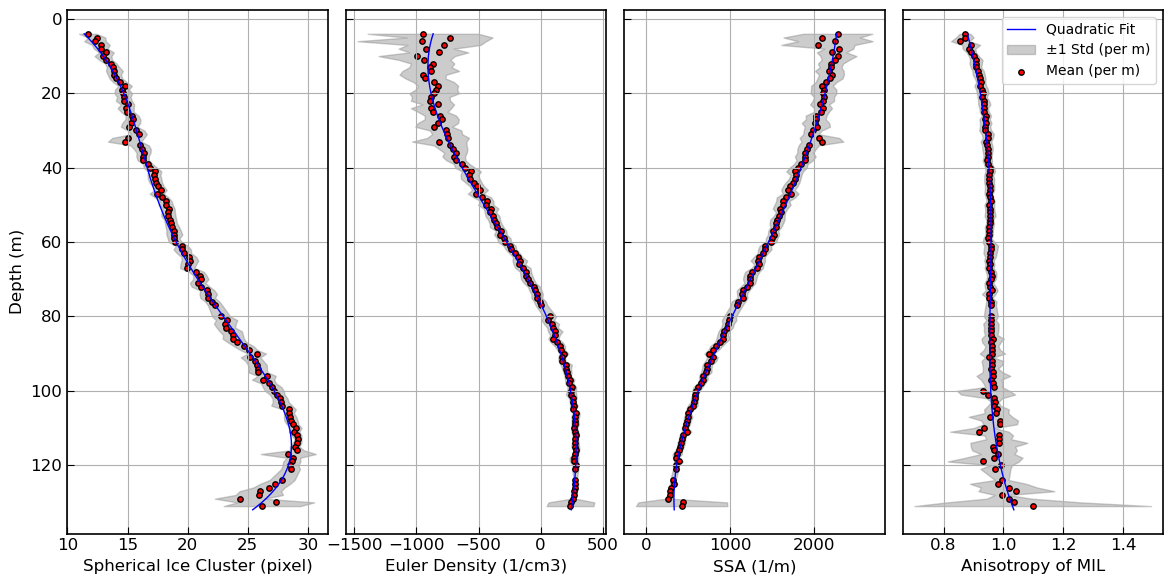

In [25]:
# Keep only necessary columns and drop NaNs
#df = df[["new_depth", "porosity", "SSA", "MIL_z"]].dropna()

# Sort data by depth for smooth plotting
df = df.sort_values(by="new_depth")

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

# Apply academic-style formatting
plt.rcParams.update({
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5
})

# Plot configs
params = [
    ("sph_ice_cluster", "Spherical Ice Cluster (pixel)"),
    ("euler_density", "Euler Density (1/cm3)"),
    ("SSA", "SSA (1/m)"),
    ("anisotropy_MIL", "Anisotropy of MIL")
]


for ax, (col, xlabel) in zip(axes, params):
    print (col)
    x = df[col]
    y = df["new_depth"]
    
    df["depth_bin"] = df["new_depth"].astype(int)
    grouped = df.groupby("depth_bin")[col]

    mean_per_bin = grouped.mean()
    std_per_bin = grouped.std()
    depth_bins = mean_per_bin.index

        
        # Fit quadratic
    coeffs = np.polyfit(y, x, deg=4)
    poly = np.poly1d(coeffs)
        # Generate smooth depth range from 50 to max
    y_fit = np.linspace(y.min(), y.max(), 200)
    x_fit = poly(y_fit)
    ax.plot(x_fit, y_fit, color='blue', linewidth=1, label='Quadratic Fit')
        # Plot ± std dev band around the bin means
    ax.fill_betweenx(depth_bins, mean_per_bin - std_per_bin, mean_per_bin + std_per_bin, color='gray', alpha=0.4, label='±1 Std (per m)')
    ax.scatter(mean_per_bin,depth_bins,color='Red', edgecolors='black', s=15, label='Mean (per m)')
    

    # Labels and grid
    ax.set_xlabel(xlabel)
    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Shared y-label and inverted axis
axes[0].set_ylabel("Depth (m)")
axes[0].invert_yaxis()  # Depth increases downward

# Layout adjustments
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("fig_SIC_SSA_Euler.png", dpi=600, bbox_inches='tight')
plt.show()

In [22]:
df.columns

Index(['name', 'number_of_regions', 'starting_layer', 'ending_layer', 'depth',
       'sample_volume', 'porosity', 'open_pores', 'cuted_pores',
       'isolated_pores', 'euler_density', 'SSA', 'MIL_x', 'MIL_y', 'MIL_z',
       'Perm_x', 'Perm_y', 'Perm_z', 'Tort_x', 'Tort_y', 'Tort_z',
       'sph_ice_cluster', 'num_pores', 'num_throats', 'coordination_number',
       'avg_pore_volume', 'avg_pore_diameter', 'avg_throat_diameter',
       'avg_throat_length', 'max_connections', 'median_connections',
       'num_cluster', 'max_cluster_size', 'avg_cluster_size', 'new_depth',
       'cluster_density', 'anisotropy_MIL', 'depth_bin'],
      dtype='object')

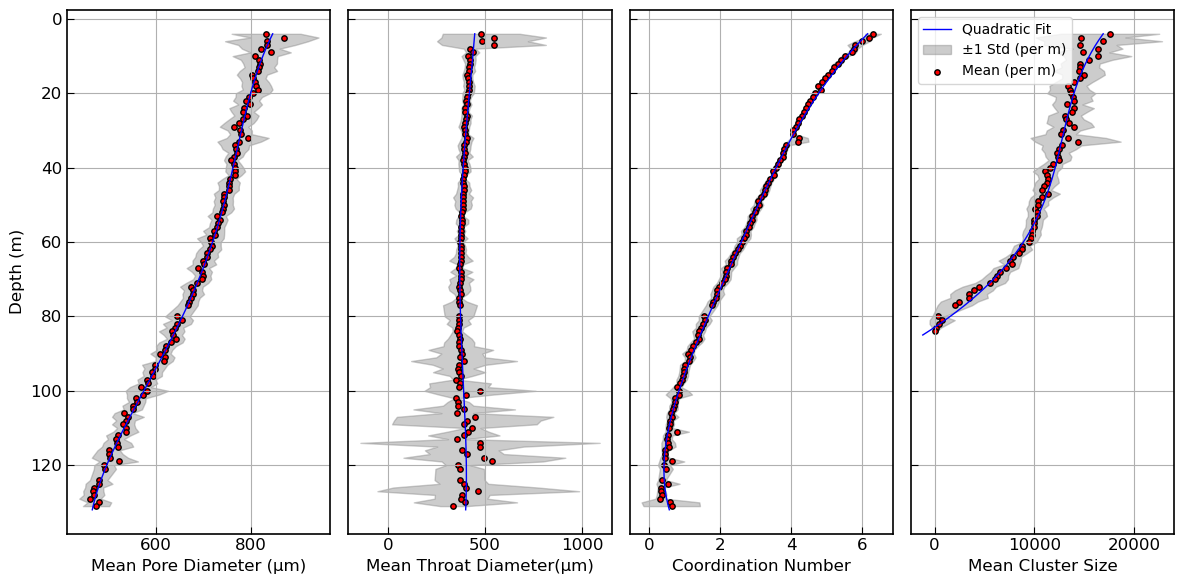

In [26]:
# Keep only necessary columns and drop NaNs
#df = df[["new_depth", "porosity", "SSA", "MIL_z"]].dropna()

# Sort data by depth for smooth plotting
df = df.sort_values(by="new_depth")

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

# Apply academic-style formatting
plt.rcParams.update({
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5
})

# Plot configs
params = [
    ("avg_pore_diameter", "Mean Pore Diameter (μm)"),
    ("avg_throat_diameter", "Mean Throat Diameter(μm)"),
    ("coordination_number", "Coordination Number"),
    ("avg_cluster_size", "Mean Cluster Size")
]

depth = df["new_depth"]

for ax, (col, xlabel) in zip(axes, params):

    
    if col == "avg_cluster_size":
        # Subset for depth >= 50
        df_fit = df[df["new_depth"] < 85].copy()
        y = df_fit["new_depth"]
        x = df_fit[col]
        df_fit["depth_bin"] = df_fit["new_depth"].astype(int)
        grouped = df_fit.groupby("depth_bin")[col]
        
    else:
        x = df[col]
        y = df["new_depth"]
        df["depth_bin"] = df["new_depth"].astype(int)
        grouped = df.groupby("depth_bin")[col]

    
    mean_per_bin = grouped.mean()
    std_per_bin = grouped.std()
    depth_bins = mean_per_bin.index

            # Fit quadratic
    coeffs = np.polyfit(y, x, deg=4)
    poly = np.poly1d(coeffs)
            # Generate smooth depth range from 50 to max
    y_fit = np.linspace(y.min(), y.max(), 200)
    x_fit = poly(y_fit)
    ax.plot(x_fit, y_fit, color='blue', linewidth=1, label='Quadratic Fit')
            # Plot ± std dev band around the bin means
    ax.fill_betweenx(depth_bins, mean_per_bin - std_per_bin, mean_per_bin + std_per_bin, color='gray', alpha=0.4, label='±1 Std (per m)')
    ax.scatter(mean_per_bin,depth_bins,color='Red', edgecolors='black', s=15, label='Mean (per m)')
    
    
    # Labels and grid
    ax.set_xlabel(xlabel)
    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Shared y-label and inverted axis
axes[0].set_ylabel("Depth (m)")
axes[0].invert_yaxis()  # Depth increases downward

# Layout adjustments
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig("fig_network.png", dpi=600, bbox_inches='tight')
plt.show()

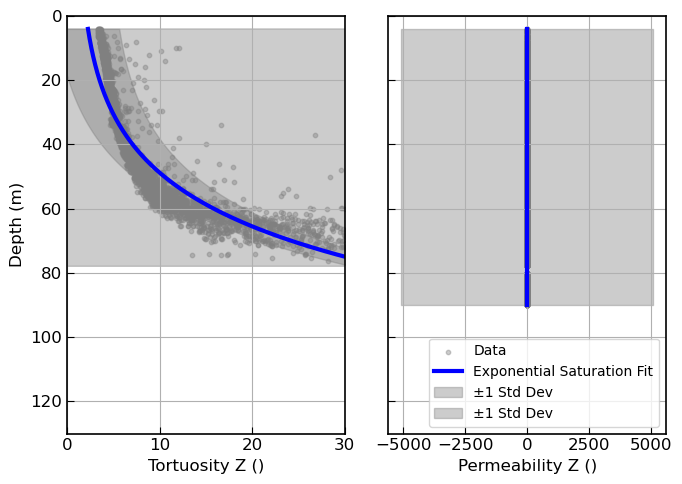

In [24]:

from scipy.optimize import curve_fit

# Exponential model: x = a * exp(b * y) + c
def log_model(y, a, b, c):
    return a * np.log(y + b) + c

def exp_decay(y, a, b, c):
    return a * np.exp(-b * y) + c

# Exponential saturation model
def exp_saturation(y, a, b, c):
    return a * (1 - np.exp(-b * y)) + c

def exp_model(y, b, c):
    return  np.exp(b * y) + c

# Sort data by depth for smooth plotting
df = df.sort_values(by="new_depth")

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharey=True)

# Apply academic-style formatting
plt.rcParams.update({
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5
})

# Plot configs
params = [
    ('Tort_z', "Tortuosity Z ()"),
    ("Perm_z", "Permeability Z ()"),
]

depth = df["new_depth"]

for ax, (col, xlabel) in zip(axes, params):
    x = df[col]
    y = depth
    
    # Scatter plot
    #ax.scatter(x, y, color='gray', alpha=0.4, s=10, label='Data')

        # Trend line
    if col == "Tort_z" :
        # Subset for depth >= 50
        df_fit = df[(df["Tort_z"] < 40) & (df["Tort_z"] > 0) & (df["new_depth"] < 80)]
        
        y_fit_data = df_fit["new_depth"]
        x_fit_data = df_fit[col] 

        ax.scatter(x_fit_data, y_fit_data, color='gray', alpha=0.4, s=10, label='Data')
        # Fit quadratic
        # Fit exponential model
        try:
            popt, _ = curve_fit(exp_model, y_fit_data, x_fit_data, maxfev=10000)
            y_fit = np.linspace(y_fit_data.min(), y_fit_data.max(), 200)
            x_fit = exp_model(y_fit, *popt)
            ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Exponential Fit')
            
            # Residuals and std
            residuals = x_fit_data - exp_model(y_fit_data, *popt)
            std = np.std(residuals)
            ax.fill_betweenx(y_fit, exp_model(y_fit, *popt) - std, exp_model(y_fit, *popt) + std, 
                             color='gray', alpha=0.4, label='±1 Std Dev')
        except RuntimeError:
            print("Exponential fit did not converge.")
        ax.set_xlim(0, 30)
        ax.set_ylim(0, 130)

    elif col == 'Perm_z':
        df_fit = df[(df["Perm_z"] < 1e-8) & (df["Perm_z"] > 0) & (df["new_depth"] < 90)]
        y_fit_data = df_fit["new_depth"]
        x_fit_data = df_fit[col]
        ax.scatter(x_fit_data, y_fit_data, color='gray', alpha=0.4, s=10, label='Data')

        try:
            # Fit
            popt, _ = curve_fit(exp_saturation, y_fit_data, x_fit_data, p0=(1e-8, 0.1, 0), maxfev=10000)
            y_fit = np.linspace(y_fit_data.min(), y_fit_data.max(), 200)
            x_fit = exp_saturation(y_fit, *popt)
    
            ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Exponential Saturation Fit')
    
            # Residuals and std shading
            residuals = x_fit_data - log_model(y_fit_data, *popt)
            std = np.std(residuals)
            ax.fill_betweenx(y_fit, x_fit - std, x_fit + std, color='gray', alpha=0.4, label='±1 Std Dev')
    
        except RuntimeError:
            print("Fit did not converge.")
            ax.set_xlim(0, 1e-8)
    else:
        # Quadratic fit
        coeffs = np.polyfit(x=y, y=x, deg=2)        # x vs depth (i.e., x = f(y))
        poly = np.poly1d(coeffs)
        y_fit = np.linspace(y.min(), y.max(), 200)  # Smooth y values
        x_fit = poly(y_fit)
    
    # Plot trend line
        ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Quadratic Fit')
        #ax.set_xlim(-2, 100)



        # Residuals and std
    residuals = x_fit_data - poly(y_fit_data)
    std = np.std(residuals)
    ax.fill_betweenx(y_fit, x_fit - std, x_fit + std, color='gray', alpha=0.4, label='±1 Std Dev')
    
    # Labels and grid
    ax.set_xlabel(xlabel)
    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Shared y-label and inverted axis
axes[0].set_ylabel("Depth (m)")
axes[0].invert_yaxis()  # Depth increases downward

# Layout adjustments
plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
#plt.savefig("fig_perm_tort_1.png", dpi=600, bbox_inches='tight')
plt.show()

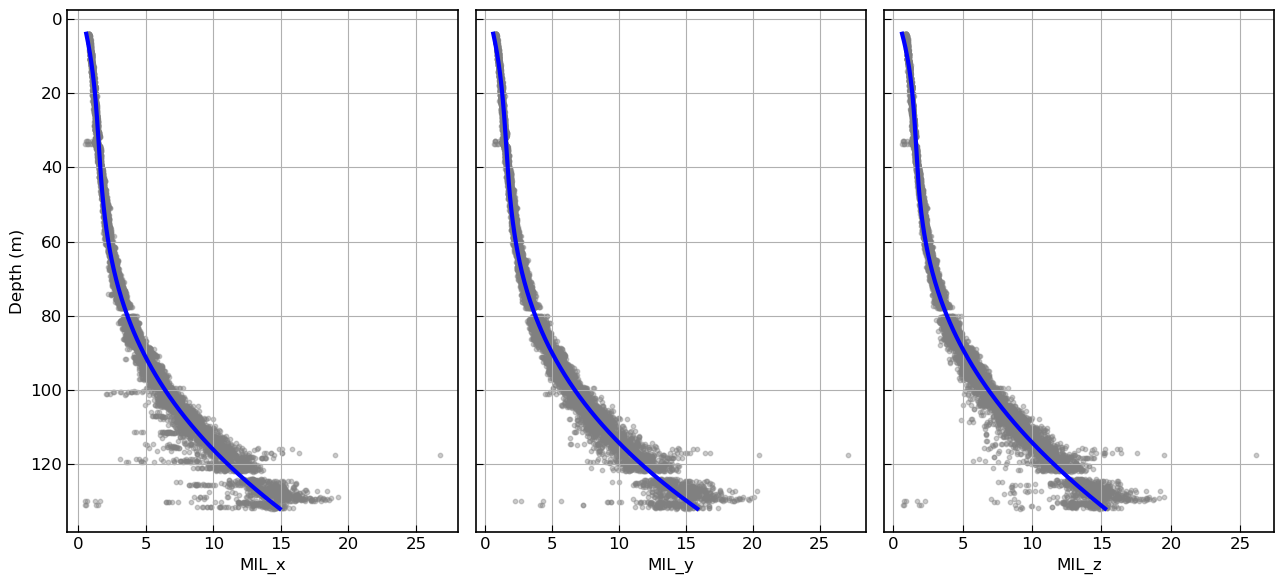

In [63]:
# Keep only necessary columns and drop NaNs
#df = df[["new_depth", "porosity", "SSA", "MIL_z"]].dropna()

# Sort data by depth for smooth plotting
df = df.sort_values(by="new_depth")

# Create figure with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(13, 6), sharey=True)

# Apply academic-style formatting
plt.rcParams.update({
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5
})
'MIL_x', 'MIL_y', 'MIL_z'
# Plot configs
params = [
    ("MIL_x", "MIL_x"),
    ("MIL_y", "MIL_y"),
    ("MIL_z", "MIL_z")
]

depth = df["new_depth"]

for ax, (col, xlabel) in zip(axes, params):
    x = df[col]
    y = depth
    
    # Scatter plot
    ax.scatter(x, y, color='gray', alpha=0.4, s=10, label='Data')

        # Trend line
    if col == "open_pores":
        # Subset for depth >= 50
        df_fit = df[df["new_depth"] < 90]
        y_fit_data = df_fit["new_depth"]
        x_fit_data = df_fit[col]
        # Fit quadratic
        coeffs = np.polyfit(y_fit_data, x_fit_data, deg=3)
        poly = np.poly1d(coeffs)
        # Generate smooth depth range from 50 to max
        y_fit = np.linspace(y_fit_data.min(), y_fit_data.max(), 200)
        x_fit = poly(y_fit)
        ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Quadratic Fit (depth ≥ 50)')
        ax.set_xlim(-2, 100)
        
    elif col == 'isolated_pores':
        df_fit = df[df["new_depth"] >= 65]
        y_fit_data = df_fit["new_depth"]
        x_fit_data = df_fit[col]
        
        # Fit quadratic
        coeffs = np.polyfit(y_fit_data, x_fit_data, deg=3)
        poly = np.poly1d(coeffs)

        # Generate smooth depth range from 50 to max
        y_fit = np.linspace(y_fit_data.min(),  y_fit_data.max(), 200)
        x_fit = poly(y_fit)
        ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Quadratic Fit (depth ≥ 50)')
        #ax.set_xlim(-0.1, 10)
    else:
        # Quadratic fit
        coeffs = np.polyfit(x=y, y=x, deg=4)        # x vs depth (i.e., x = f(y))
        poly = np.poly1d(coeffs)
        y_fit = np.linspace(y.min(), y.max(), 200)  # Smooth y values
        x_fit = poly(y_fit)
    
    # Plot trend line
        ax.plot(x_fit, y_fit, color='blue', linewidth=3, label='Quadratic Fit')
        #ax.set_xlim(-2, 100)
    
    # Labels and grid
    ax.set_xlabel(xlabel)
    ax.grid(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

# Shared y-label and inverted axis
axes[0].set_ylabel("Depth (m)")
axes[0].invert_yaxis()  # Depth increases downward

# Layout adjustments
plt.tight_layout()
plt.savefig("MIL.png", dpi=600, bbox_inches='tight')
plt.show()

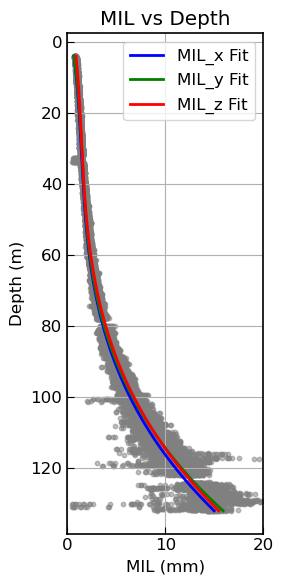

In [118]:
fig, ax = plt.subplots(figsize=(3, 6))

for mil_col, label, color in [("MIL_x", "MIL_x", 'blue'), 
                              ("MIL_y", "MIL_y", 'green'), 
                              ("MIL_z", "MIL_z", 'red')]:
    x = df["new_depth"]
    y = df[mil_col]
    
    # Scatter
    ax.scatter( y, x,color='gray', s=10, alpha=0.5)

    # Fit and plot quadratic trend
    coeffs = np.polyfit(x, y, deg=3)
    poly = np.poly1d(coeffs)
    x_fit = np.linspace(x.min(), x.max(), 300)
    y_fit = poly(x_fit)
    ax.plot( y_fit,x_fit, color=color, linewidth=2, label=f'{label} Fit')

# Style
ax.set_xlabel("MIL (mm)")
ax.set_ylabel("Depth (m)")
ax.set_title("MIL vs Depth")
ax.grid(True)
ax.legend()
ax.invert_yaxis()  # Optional: reverse depth direction
ax.set_xlim(0, 20)  # Optional
# ax.set_ylim(0, 5)    # Optional

plt.tight_layout()
plt.savefig("MIL_vs_depth.png", dpi=600, bbox_inches='tight')
plt.show()


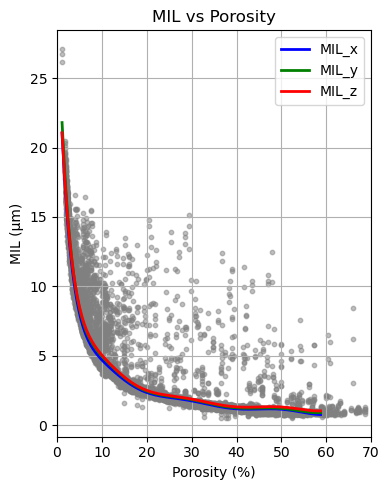

In [4]:
fig, ax = plt.subplots(figsize=(4, 5))

for mil_col, label, color in [("MIL_x", "MIL_x", 'blue'), 
                              ("MIL_y", "MIL_y", 'green'), 
                              ("MIL_z", "MIL_z", 'red')]:
    
    # Full scatter
    ax.scatter(df["porosity"], df[mil_col], color='gray', s=10, alpha=0.5)
    
    # Subset data for trend line (porosity < 60)
    mask = df["porosity"] < 100
    x_fit_data = df.loc[mask, "porosity"]
    y_fit_data = df.loc[mask, mil_col]
    
    # Fit and plot quadratic trend line
    coeffs = np.polyfit(x_fit_data, y_fit_data, deg=10)
    poly = np.poly1d(coeffs)
    x_fit = np.linspace(x_fit_data.min(), x_fit_data.max(), 300)
    y_fit = poly(x_fit)

    ax.plot(x_fit[:220], y_fit[:220], color=color, linewidth=2, label=f'{label}')

# Formatting
ax.set_xlabel("Porosity (%)")
ax.set_ylabel("MIL (µm)")
ax.set_title("MIL vs Porosity")
ax.grid(True)
ax.legend()
ax.set_xlim(0, 70)   # Full porosity range for scatter
# ax.set_ylim(0, 5)    # Optional y-limit

plt.tight_layout()
plt.savefig("MIL_vs_porosity_limited_fit.png", dpi=600, bbox_inches='tight')
plt.show()


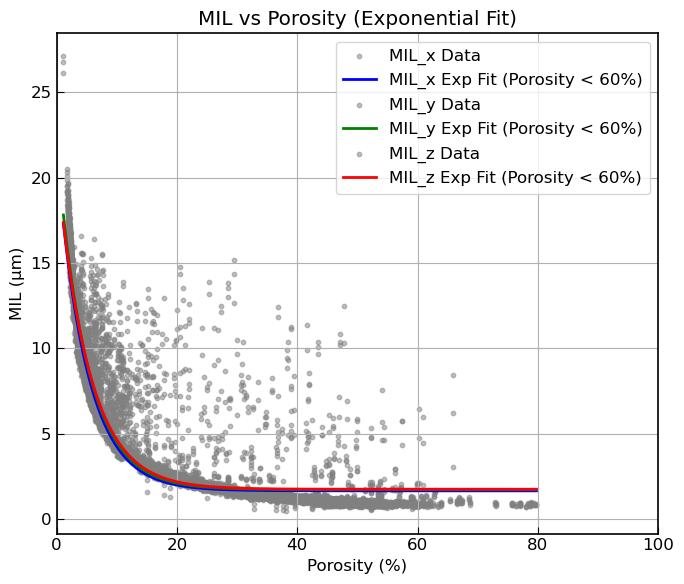

In [100]:

# Define offset exponential function
def exp_offset(x, a, b, c):
    return a * np.exp(b * x) + c
    
# Start plotting
fig, ax = plt.subplots(figsize=(7, 6))

for mil_col, label, color in [("MIL_x", "MIL_x", 'blue'), 
                              ("MIL_y", "MIL_y", 'green'), 
                              ("MIL_z", "MIL_z", 'red')]:
    
    # Full scatter plot
    ax.scatter(df["porosity"], df[mil_col], color='gray', s=10, alpha=0.5, label=f'{label} Data')

    # Subset for porosity < 60
    mask = df["porosity"] < 100
    x_data = df.loc[mask, "porosity"]
    y_data = df.loc[mask, mil_col]
    
    try:
        popt, _ = curve_fit(exp_offset, x_data, y_data, p0=(1, 0.01, 0), maxfev=10000)
        x_fit = np.linspace(x_data.min(), x_data.max(), 300)
        y_fit = exp_offset(x_fit, *popt)
        ax.plot(x_fit, y_fit, color=color, linewidth=2, label=f'{label} Exp Fit (Porosity < 60%)')
    except RuntimeError:
        print(f"Could not fit exponential with offset for {label}")

# Final formatting
ax.set_xlabel("Porosity (%)")
ax.set_ylabel("MIL (µm)")
ax.set_title("MIL vs Porosity (Exponential Fit)")
ax.grid(True)
ax.legend()
ax.set_xlim(0, 100)  # Full porosity range
# ax.set_ylim(0, 5)  # Optional

plt.tight_layout()
#plt.savefig("MIL_vs_porosity_exponential_fit.png", dpi=600, bbox_inches='tight')
plt.show()
